# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [67]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data
training_file = 'traffic-signs-data/train.p'
testing_file = 'traffic-signs-data/test.p'


with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 2D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

In [68]:
### Replace each question mark with the appropriate value.
import numpy as np

# TODO: Number of training examples
n_train = len(train['features'])

# TODO: Number of testing examples.
n_test = len(test['features'])

# TODO: What's the shape of an traffic sign image?
image_shape = test['features'][0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes =  len(np.unique(test['labels']))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

# tests for fun
assert(train['features'][0].shape == test['features'][0].shape)
assert(len(X_test) == len(y_test))

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

sign label:0 -  count:210
sign label:1 -  count:2220
sign label:2 -  count:2250
sign label:3 -  count:1410
sign label:4 -  count:1980
sign label:5 -  count:1860
sign label:6 -  count:420
sign label:7 -  count:1440
sign label:8 -  count:1410
sign label:9 -  count:1470
sign label:10 -  count:2010
sign label:11 -  count:1320
sign label:12 -  count:2100
sign label:13 -  count:2160
sign label:14 -  count:780
sign label:15 -  count:630
sign label:16 -  count:420
sign label:17 -  count:1110
sign label:18 -  count:1200
sign label:19 -  count:210
sign label:20 -  count:360
sign label:21 -  count:330
sign label:22 -  count:390
sign label:23 -  count:510
sign label:24 -  count:270
sign label:25 -  count:1500
sign label:26 -  count:600
sign label:27 -  count:240
sign label:28 -  count:540
sign label:29 -  count:270
sign label:30 -  count:450
sign label:31 -  count:780
sign label:32 -  count:240
sign label:33 -  count:689
sign label:34 -  count:420
sign label:35 -  count:1200
sign label:36 -  count

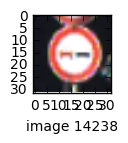

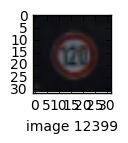

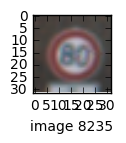

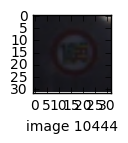

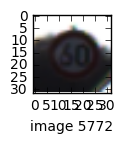

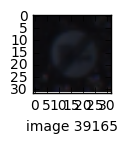

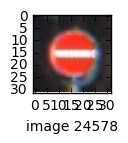

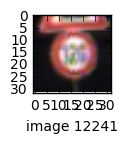

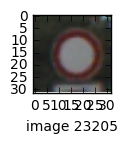

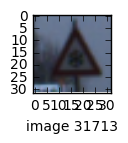

In [69]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.
import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import cv2
import matplotlib.image as mpimg
import collections

#show counts of the training data 
training_array = train['labels'].tolist()
counts = collections.Counter(training_array)

for key,value in enumerate(counts):
    print("sign label:" + str(key) + " -  count:" + str(counts.get(key)))

#plot ten random sign images
random_sign_images = random.sample(range(len(X_train)), 10)

for image in random_sign_images:
    plt.figure(figsize=(1,1))
    plt.xlabel("image " + str(int(image)))
    plt.imshow(X_train[int(image)], cmap="gray")


----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [71]:
### Preprocess the data here.
### Feel free to use as many code cells as needed.

from sklearn.utils import shuffle
from sklearn import preprocessing



def normalize(image_data):
    """
    Normalize the image data with Min-Max scaling to a range of [0.1, 0.9]
    :param image_data: The image data to be normalized
    :return: Normalized image data
    """
    image_min = np.amin(image_data)
    image_max = np.amax(image_data) 
    a = 0.1
    b = 0.9
    floats = image_data.astype(float)
    return a + ( ( (image_data - image_min)*(b - a) )/( image_max - image_min ) )

#normalYZE
X_train = normalize(X_train)

# Shuffle the training data to prevent the model from learning the order of the training
#X_train, y_train = shuffle(X_train, y_train)


print("normalized and shuffled")

normalized and shuffled


### Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?_

**Answer:** 
<p>Preprocessing techniques I used include shuffling the data set and normalizing the data. I shuffled the data to prevent the model from learning the order of the training data. However, I noticed that the loop that trains the data also shuffles the data. So, this may not have been necessary. I normalized the data to ensure different features that get fed to the model are the same shape and scale.</p>
<p>Techniques I could have used include, but are not limited to:</p>
- padding the input data. This wasn't necessary to use the provided images with the LeNet template
- converting the images to greyscale. I didn't do this, because color proved important to the classification


### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

In [72]:
### Generate data additional data (OPTIONAL!)
### and split the data into training/validation/testing sets here. 
### Feel free to use as many code cells as needed.
import sklearn

# Get randomized datasets for training and validation
from sklearn.model_selection import train_test_split

train_features, x_valid, train_labels, y_valid = train_test_split(
    X_train,
    y_train,
    test_size=0.20,
    random_state=832289)

print("number of validation features ", len(x_valid))
print("number of training features ", len(X_train))

#probably don't need to do this as this is done below
#x_valid, y_valid = shuffle(X_train, y_train)


number of validation features  7842
number of training features  39209


**Answer:** <p>Since the images were basically the same shape as the ones the LeNet sample used, I didn't do much to set up the data. I basically referenced the features and labels for each data set in the pickle file(s). I subsequently broke of a random subset of the training data for validation data, which was generated with the train_test_split function from sklearn. As the print out above indicates, the sizes of the data sets are different (validation is a 20% subset of the training data).</p>

<p>One technique which was not used is jittering the data, creating extra data for each sign type that shows it from different angles and perspectives.</p>


In [73]:
### Define your architecture here.
### Feel free to use as many code cells as needed.
# check accuracy against validation data 

# set up tensor flow 
import tensorflow as tf

EPOCHS = 8
BATCH_SIZE = 128

#leNet
from tensorflow.contrib.layers import flatten

def LeNet(x):    
    # Hyperparameters
    mu = 0
    sigma = 0.1
    
    #Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 3, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    #Activation.
    conv1 = tf.nn.relu(conv1)

    #Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    #Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    #Activation.
    conv2 = tf.nn.relu(conv2)

    #Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    #Flatten. Input = 5x5x16. Output = 400.
    fc0   = flatten(conv2)
    
    #Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    #Activation.
    fc1    = tf.nn.relu(fc1)

    #Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    #Activation.
    fc2    = tf.nn.relu(fc2)

    #Layer 5: Fully Connected. Input = 84. Output = 43.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, n_classes), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(n_classes))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits





### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:**
<p>My architecture is identical to the Udacity customized LeNet sample, a deep (having five or more layers) convolutional neural network. It accepts a 32x32x3 image into the pipeline that outputs a fully connected logits layer (of German traffic signs)</p>

<p>Inputs are first passed through a convolutional layer that normalizes and reshapes the image, applies a RELU function and then pools them to reduce their footprint. This layer needed a slight modification, as the inputs were in color, as opposed to the LeNet lab sample. Note: This approach replaces subsampling, which was traditionally used in the original LeNet architecture. </p>

<p>This is followed by another convolutional layer, where in addition to reshaping and pooling the image is flattened from 3d to 2d.</p>

<p>The convolutional layers are followed by three fully connected layers that iteratively calculate the logit mappings. The final layer needed to be tweaked to return the proper number of mappings (43)</p>

In [74]:
### Train your model here.
### Feel free to use as many code cells as needed.

#placeholders for images and labels
x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, n_classes)


In [75]:
#training pipeline
rate = 0.001

logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

In [76]:
#evaluation function
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

In [77]:
#training
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
            
        validation_accuracy = evaluate(x_valid, y_valid)
        training_accuracy = evaluate(X_train, y_train)
        
    
        
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy - Training Accuracy = {:.3f} - {:.3f}".format(validation_accuracy,training_accuracy))
        print()
        print("----")        
    saver.save(sess, 'lenet')
    print("Model saved")

Training...

EPOCH 1 ...
Validation Accuracy - Training Accuracy = 0.706 - 0.709

----
EPOCH 2 ...
Validation Accuracy - Training Accuracy = 0.868 - 0.873

----
EPOCH 3 ...
Validation Accuracy - Training Accuracy = 0.895 - 0.898

----
EPOCH 4 ...
Validation Accuracy - Training Accuracy = 0.947 - 0.948

----
EPOCH 5 ...
Validation Accuracy - Training Accuracy = 0.958 - 0.960

----
EPOCH 6 ...
Validation Accuracy - Training Accuracy = 0.960 - 0.960

----
EPOCH 7 ...
Validation Accuracy - Training Accuracy = 0.972 - 0.974

----
EPOCH 8 ...
Validation Accuracy - Training Accuracy = 0.973 - 0.976

----
Model saved


### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:**

<p>Again, I took cues from the LeNet lab, as well as some rules of thumb covered in class for training my model. These include: </p>
<ul>
<li>The Adam optomizer for my optimizer (to aid in calculating the gradient descents)</li>
<li>10 Epochs with a Batch size of 128 - to balance the number of  iterations (backpropagations) vs the number of Epochs chosen</li>
<li>A low learning rate of .001, as suggested by Vincent Vanhoucke in the lectures</li>
</ul>
 

### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

**Answer:**

<br>As I came into this exercise with zero understanding of deep learning, so my approach was to take a proven and accepted solution (the LeNet architecture), which I subsequently tweaked slightly with a bit of trial and error. I think that this approach was very appropriate, because LeNet is an excellent "first architecture" <sup>1</sup>  to get your feet wet with CNNs, and it well suited for image classification. </br>

<p>The final results were around 85% accuracy, which I though was acceptable for a first pass. I believe jittering the images would improve my results.  And mosyt importantly, I got a great introduction to, as well as learned a tremendous amount about, CNNs, so mission accomplished!</p>

 1 http://www.pyimagesearch.com/2016/08/01/lenet-convolutional-neural-network-in-python/

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [78]:
import os 

predictions = tf.nn.softmax(logits) 

images = os.listdir("traffic-signs-data/new_images")
new_images = []
image_truth = []

for image in images:
    image_bits = mpimg.imread("traffic-signs-data/new_images/" + image)
    three_channel_image = cv2.cvtColor(image_bits, cv2.COLOR_RGB2HSV)
    three_channel_image = cv2.cvtColor(three_channel_image,cv2.COLOR_HSV2RGB)
    new_images.append(three_channel_image)
    image_truth.append(int(image.replace(".png","").replace("_2","").replace("_3","")))    
  
new_images = normalize(np.array(new_images))

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    pred_vals = sess.run(predictions, feed_dict={x: new_images})
    predictions = np.argmax(pred_vals, 1)
    saver.save(sess, 'lenet')
    print("predicted values" , predictions)
    print("actual values" , image_truth) 
    

predicted values [ 5  9  5 14  1 31 14  1  1 38  2 13]
actual values [5, 0, 5, 14, 0, 31, 14, 1, 1, 38, 5, 13]


### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._



**Answer:** <p>I chose a set of images on the internet that closely resembled the training and test data. These images included different versions of the same sign for some of the examples. I tried to represent (on a limited basis) different angles, perspectives and amounts of negative space in the images. From my small amout of testing, it appears more negative space (not having the image cropped to a sign) seemed to make classification difficult. Additionally, my CNN seemed to have some difficulty accurately classifying similar looking signs, specifically 20km,30km,50km,80km etc. </p>
<p>Again, creating more training data by jittering the images would surely improve the model's accuracy, and most likey address the issues stated above</p>

------------
predicted values from sample [13  1  1 38 14]
actual values from sample [13, 1, 0, 38, 14]


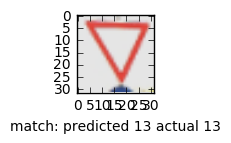

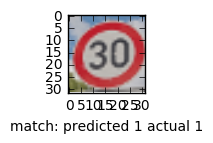

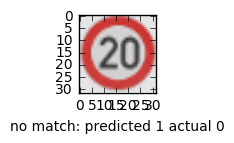

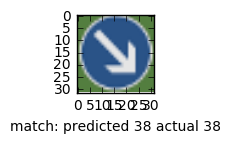

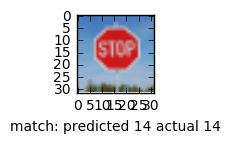

In [79]:
#TODO refactor this and the previous cell. put in a function -Don't repeat myself

#this cell choses 5 random images from the new images and pumps them throug the CNN \

random_indexes = random.sample(range(len(images)), 5)
five_random_images = []

for index in random_indexes:
    five_random_images.append(images[index])

five_new_images = []
five_image_truth = []

for image in five_random_images:
    image_bits = mpimg.imread("traffic-signs-data/new_images/" + image)
    three_channel_image = cv2.cvtColor(image_bits, cv2.COLOR_RGB2HSV)
    three_channel_image = cv2.cvtColor(three_channel_image,cv2.COLOR_HSV2RGB)
    five_new_images.append(three_channel_image)
    five_image_truth.append(int(image.replace(".png","").replace("_2","").replace("_3","")))  

five_new_images = normalize(np.array(five_new_images))
new_predictions = tf.nn.softmax(logits) 

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    print("------------")
    pred_vals = sess.run(new_predictions, feed_dict={x: five_new_images})
    predictions = np.argmax(pred_vals, 1)
    print("predicted values from sample" , predictions)
    print("actual values from sample" , five_image_truth) 
    
    fail=0
    match=0 
    for index,prediction in enumerate(predictions):
        is_match = "no match"
        if prediction == five_image_truth[index]:
            is_match = "match"
            match = match+1
        else:
            fail = fail+1
            
        plt.figure(figsize=(1,1))
        plt.xlabel(is_match + ": predicted " + str(prediction) + " actual " + str(five_image_truth[index]))
        plt.imshow(five_new_images[index], cmap="gray")
    
    saver.save(sess, 'lenet')

    


### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._


**Answer:** <p> My model does perform equally on the new images as it does on the test data set. Both data sets have about an 80% accuracy. That said, my new data set is highly contrived and was meant to closely simulate the test and traing examples. I am confident that it would fall short if there was more variation in the data, and/or signs that were unknown to the CNN were introduced (i.e. American Street signs). </p>  
<p>Once again, the addition of more and more vasried training data would address this.</p>

In [80]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    test_accuracy = evaluate(X_test, y_test)
    print("Test Data Accuracy = {:.3f}".format(test_accuracy))
    print("-----------")
    print("new data accuracy:")
    print("fail",fail)
    print("match",match)
    print("-----------")  
    print("successful matches {:.2f}%".format(match/len(five_new_images)*100))
    saver.save(sess, 'lenet')

Test Data Accuracy = 0.888
-----------
new data accuracy:
fail 1
match 4
-----------
successful matches 80.00%


### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

**Answer:**
<p>The model consistently has trouble displaying signs that are not cropped to the sign itself and signs that are similar. In the case above, it classified a 20KM sign as a 30km sign. However, when the model does make a wrong prediction, it is included in the top 5 predictions. This information, along with the probablility of a prediction could come in handy when the probability of a match is low.</p>

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

In [82]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    top_k = sess.run(tf.nn.top_k(pred_vals, 5, sorted=True))
    #print("actual values from sample" , five_image_truth) 
    #print(top_k.indices)
    for index,value in enumerate(five_image_truth):
        print("value: " + str(value) + " -  predictions:" + str(top_k.indices[index]))
    saver.save(sess, 'lenet')

value: 13 -  predictions:[13 10 12  2 14]
value: 1 -  predictions:[1 2 4 0 5]
value: 0 -  predictions:[ 1  0 32  4 38]
value: 38 -  predictions:[38 36 34 20 40]
value: 14 -  predictions:[14 12 11 17  5]
